In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
import seaborn.apionly as sns
%matplotlib inline

In [2]:
sns.set_context('poster')

In [3]:
df = pd.read_csv('results/loglike_tests.csv')

In [4]:
df

,N_scale,full_MIST,like_mode,log_like,rare_cut
0,128,True,0,-12912.0,0.00
1,128,True,1,-773740.0,0.00
2,128,True,2,-760830.0,0.00
3,128,True,3,-718730.0,0.00
4,128,True,0,-8887.1,0.00
5,128,True,1,-779940.0,0.00
6,128,True,2,-771050.0,0.00
7,128,True,3,-734200.0,0.00
8,128,True,0,-5547.0,0.00
9,128,True,1,-735080.0,0.00


In [33]:
df.rare_cut.unique()

array([  0.00000000e+00,   1.00000000e-10,   1.00000000e-08,
         1.00000000e-06,   1.00000000e-04,   1.00000000e-02])

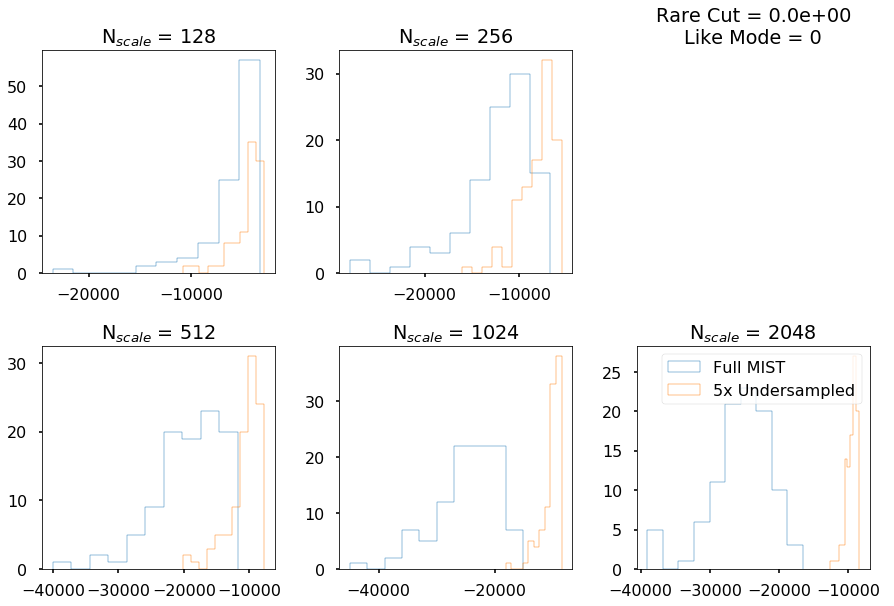

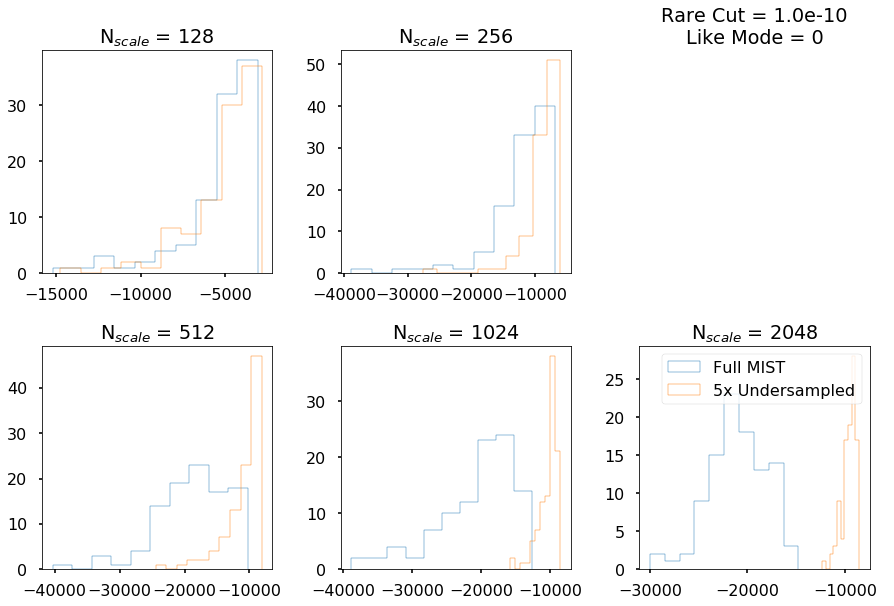

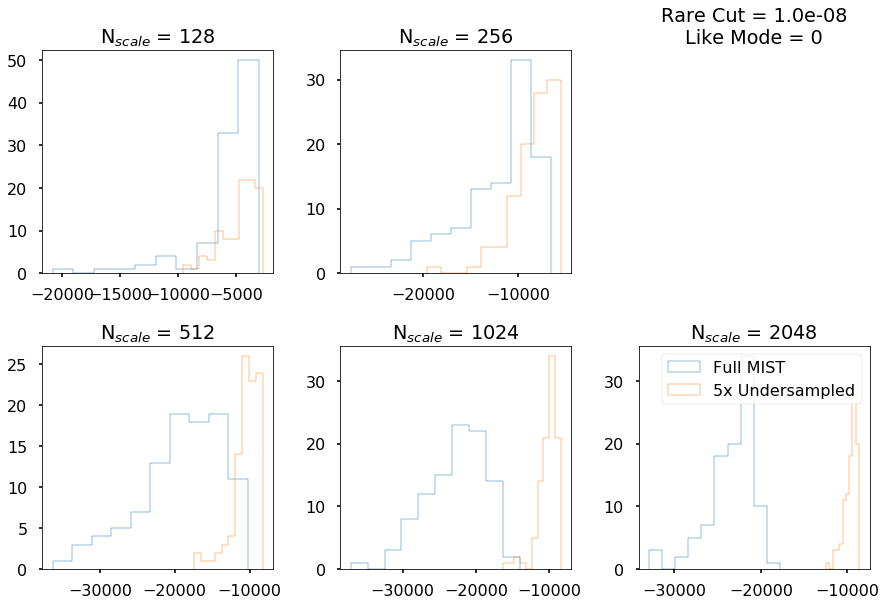

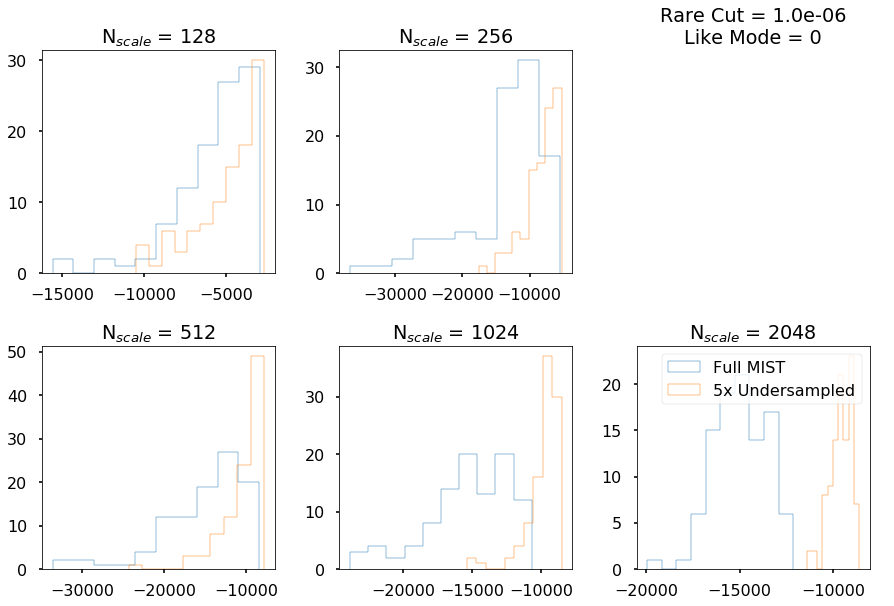

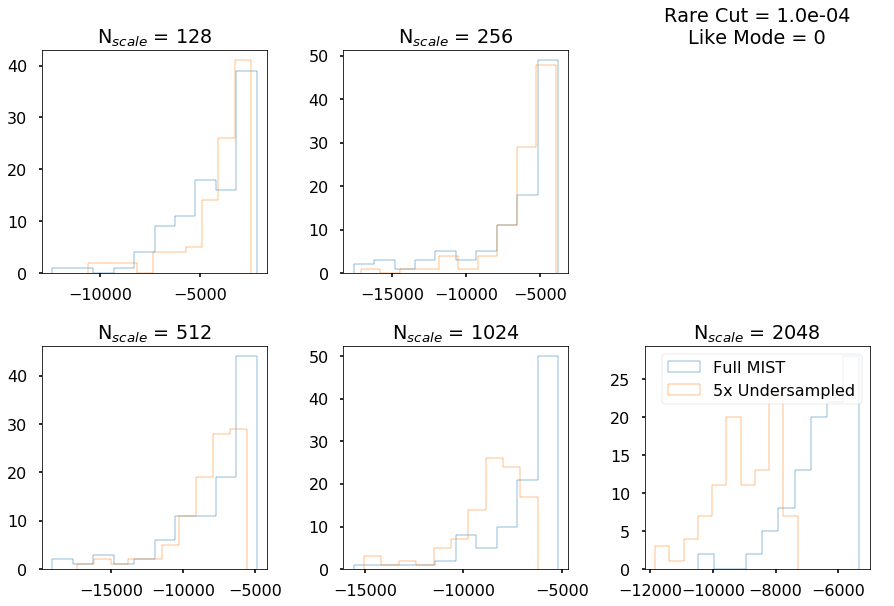

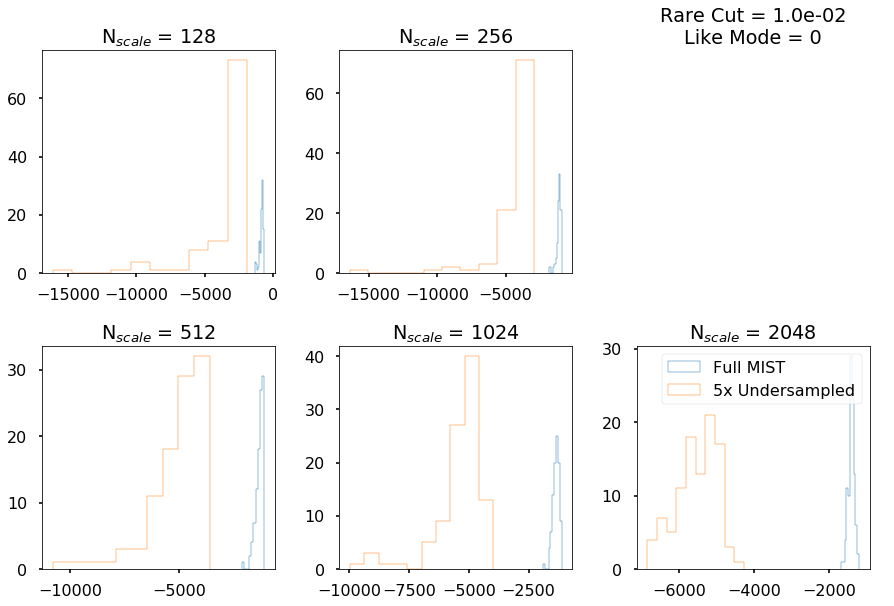

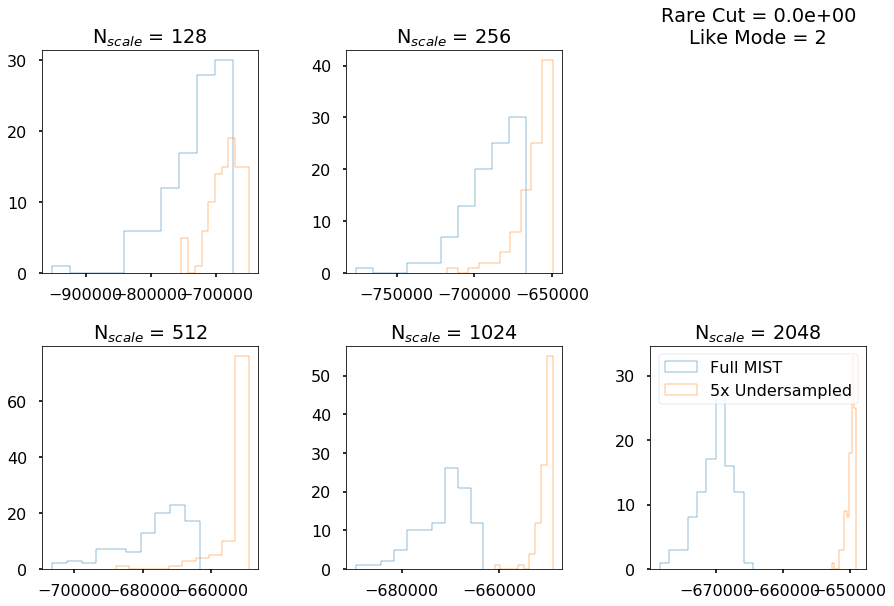

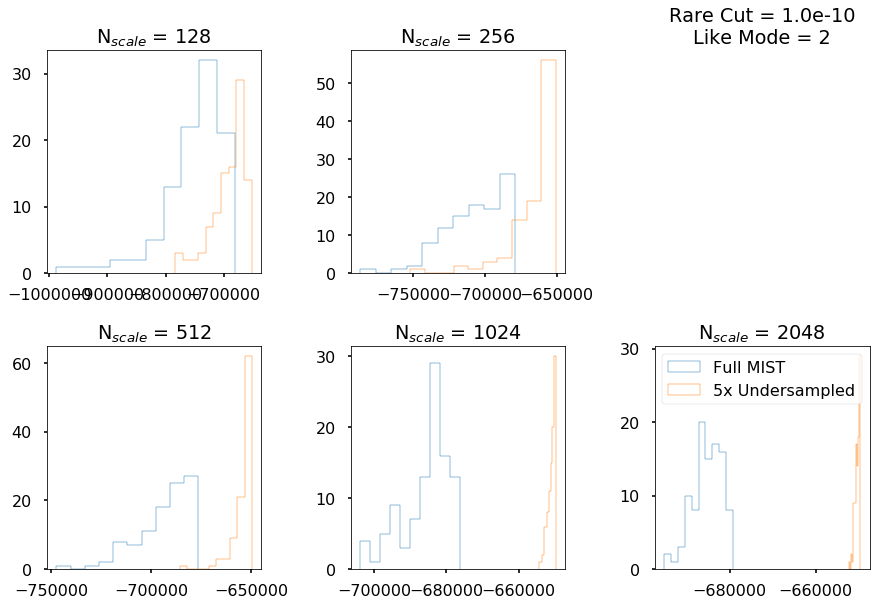

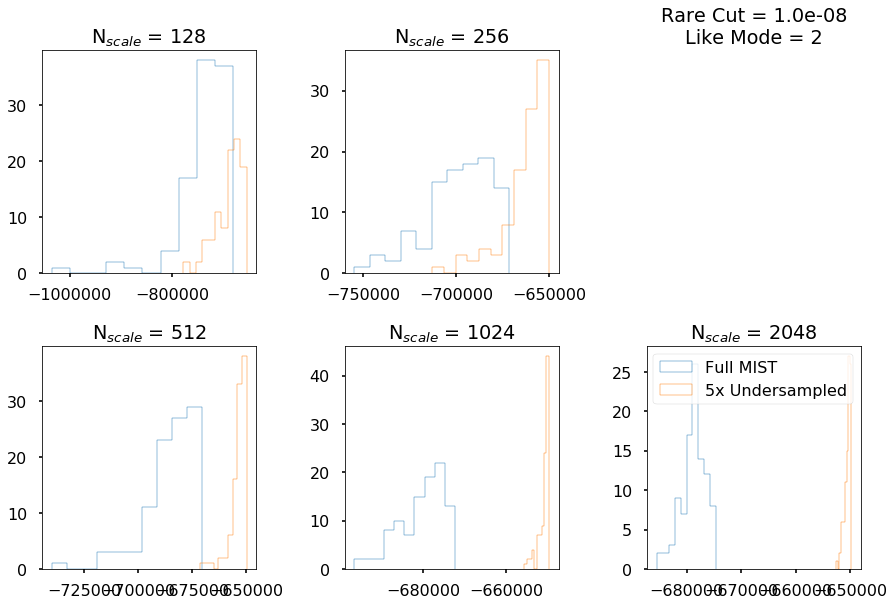

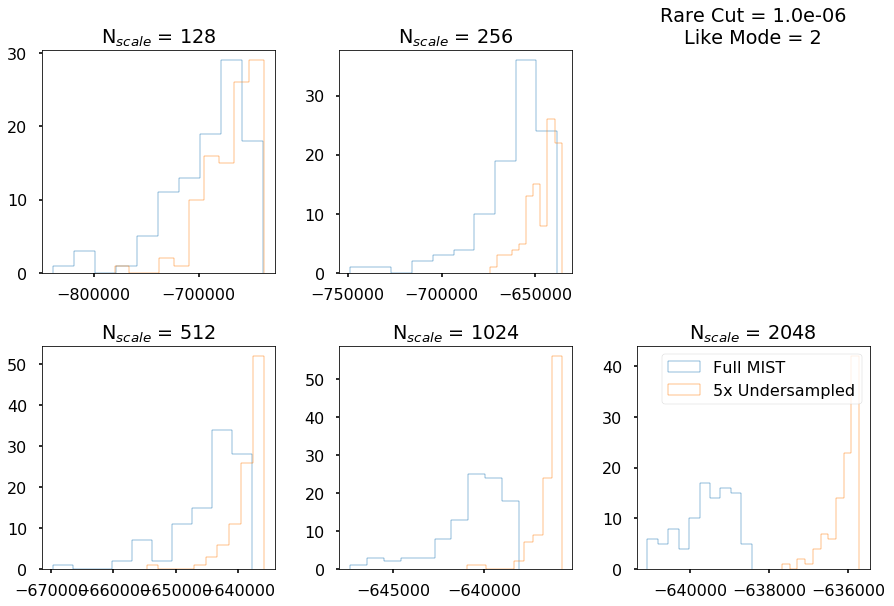

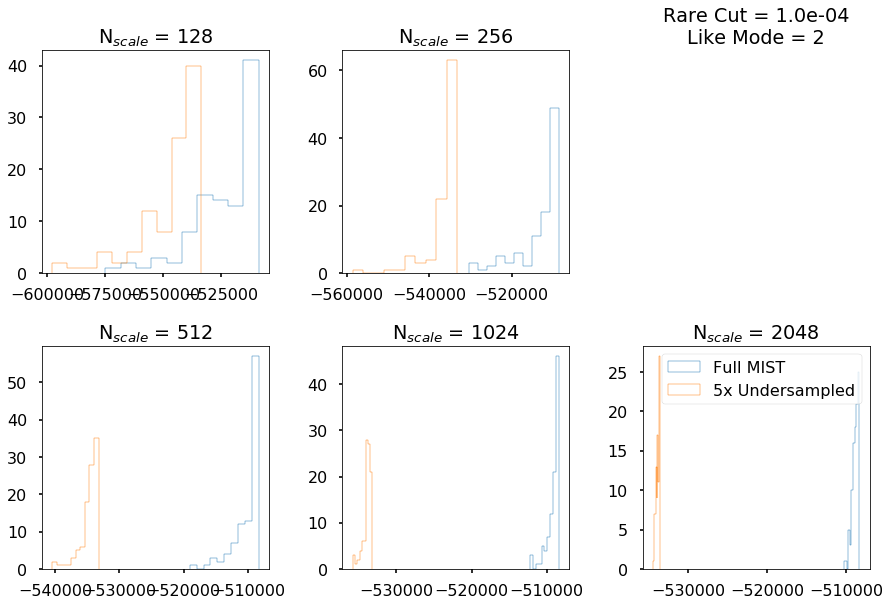

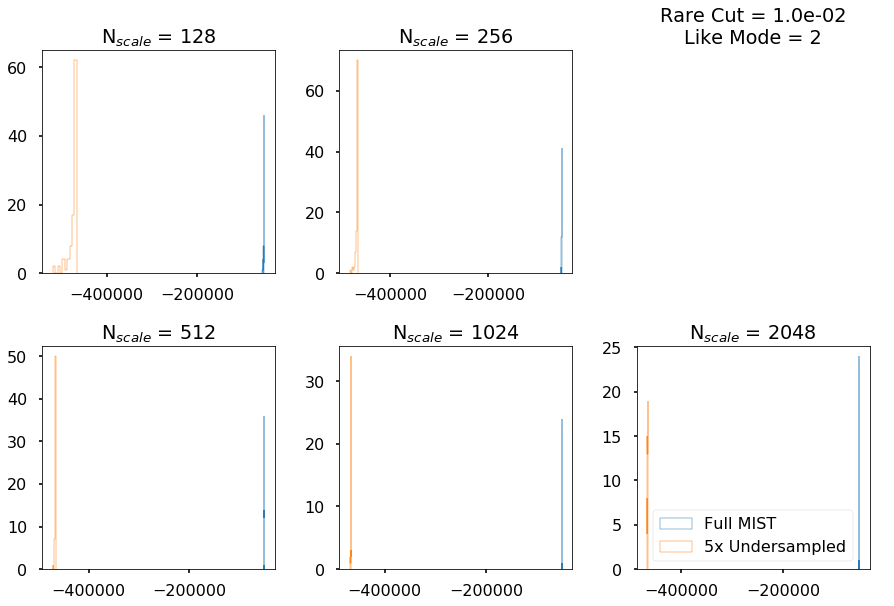

In [40]:
lm = 0
rc = 0.0
for lm in [0,2]:
    for rc in df.rare_cut.unique():
        fig, axes = plt.subplots(nrows=2, ncols=3)
        axes = axes.flatten()
        axes[2].axis('off')
        axes[2].set_title('Rare Cut = %.1e\nLike Mode = %d'%(rc, lm))
        axes = np.delete(axes, 2)
        Ns = [128, 256, 512, 1024, 2048]
        for i in range(5):
            N = Ns[i]
            df_f = df[(df.N_scale==N) & (df.like_mode==lm) & (df.full_MIST) & (df.rare_cut==rc)]
            df_m = df[(df.N_scale==N) & (df.like_mode==lm) & (~df.full_MIST)& (df.rare_cut==rc)]
            axes[i].hist(df_f.log_like, histtype='step', label='Full MIST')
            axes[i].hist(df_m.log_like, histtype='step', label='5x Undersampled')
            axes[i].set_title(r'N$_{scale}$ = ' + '%d'%N)
            plt.legend()
        # plt.suptitle('Rare_Cut = %.1e'%rc)
        plt.tight_layout()